# Emerging Technologies Project

The following notebook trains a model that can be used to predict power output from wind speed values, as defined in the `powerproduction` dataset.

## Preamble

I'll begin by importing the necessary packages and reading in the dataset.

In [1]:
import tensorflow.keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plot style
plt.style.use("ggplot")

# Plot size
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Read in the dataset
df = pd.read_csv("./powerproduction.csv")

# Print the first few rows
df.head(8)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826


Next I'll partition the dataset it into two subsets. The first will be used to fit the model and is referred to as the training dataset, while the second will instead be used to make predictions based on the training data. The objective of splitting the data is to provide a way to estimate the performance of the machine learning model when it is presented with new data, i.e. data that wasn't used to train the model [1].

The training set will make up 80% of the total items in the overall dataset.

In [4]:
# Create train and test sets
# Reference: Tensotflow documentation
# https://www.tensorflow.org/tutorials/keras/regression#split_the_data_into_train_and_test
train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

print("Training:")
print(train.head())
print()
print("Testing:")
print(test.head())

Training:
      speed    power
90    4.905    7.060
254  12.713   51.149
283  14.489   71.763
445  22.422   99.357
461  23.273  113.556

Testing:
    speed  power
9   0.526  5.553
25  1.051  2.085
28  1.151  1.208
31  1.301  0.000
32  1.401  4.156


In order to better visualise the training and testing data sets we can plot them both using Matplotlib.

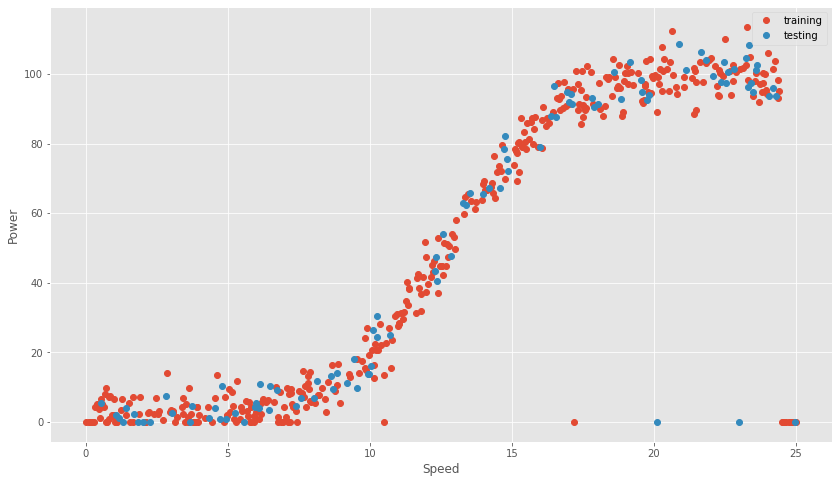

In [5]:
plt.plot(
    train.speed,
    train.power,
    'o',
    label='training'
)

plt.plot(
    test.speed, 
    test.power,
    'o',
    label='testing'
)

plt.xlabel('Speed')
plt.ylabel('Power')

plt.legend();

## Creating a Linear Model

First I'll construct a linear modal and attempt to make predictions using that. This is done below using Keras' `Sequential` class, which represents a linear grouping of layers [2]. The model created below contains a single dense layer. A dense layer is a layer in neural network that’s fully connected, meaning all the neurons in one layer are connected to all other neurons in the next layer [2].

In [6]:
# Create a neural network with one neuron
model = kr.models.Sequential()

# Add a single dense layer
model.add(
    kr.layers.Dense(
        1,
        input_shape=(1,),
        activation="linear",
        kernel_initializer='ones',
        bias_initializer='zeros'
    )
)

# Compile the model
model.compile('adam', loss='mean_squared_error')

In [7]:
# Train the neural network on the training data
model.fit(
    train.speed,
    train.power,
    epochs=200,
    batch_size=10
)

Epoch 1/200
40/40 [==============================] - 0s 802us/step - loss: 2366.8822
Epoch 2/200
40/40 [==============================] - 0s 399us/step - loss: 2206.0778
Epoch 3/200
40/40 [==============================] - 0s 569us/step - loss: 2329.1683
Epoch 4/200
40/40 [==============================] - 0s 801us/step - loss: 2476.8320
Epoch 5/200
40/40 [==============================] - 0s 401us/step - loss: 2229.3071
Epoch 6/200
40/40 [==============================] - 0s 968us/step - loss: 2171.7699
Epoch 7/200
40/40 [==============================] - 0s 402us/step - loss: 2138.7103
Epoch 8/200
40/40 [==============================] - ETA: 0s - loss: 2888.38 - 0s 800us/step - loss: 2265.2978
Epoch 9/200
40/40 [==============================] - 0s 400us/step - loss: 1988.8826
Epoch 10/200
40/40 [==============================] - 0s 568us/step - loss: 1853.3356
Epoch 11/200
40/40 [==============================] - 0s 801us/step - loss: 2039.5652
Epoch 12/200
40/40 [=================

40/40 [==============================] - 0s 567us/step - loss: 511.8448
Epoch 97/200
40/40 [==============================] - 0s 802us/step - loss: 496.1411
Epoch 98/200
40/40 [==============================] - 0s 401us/step - loss: 539.7849
Epoch 99/200
40/40 [==============================] - 0s 801us/step - loss: 735.2788
Epoch 100/200
40/40 [==============================] - 0s 568us/step - loss: 544.3672
Epoch 101/200
40/40 [==============================] - 0s 802us/step - loss: 569.5697
Epoch 102/200
40/40 [==============================] - 0s 401us/step - loss: 592.5420
Epoch 103/200
40/40 [==============================] - 0s 400us/step - loss: 623.1565
Epoch 104/200
40/40 [==============================] - 0s 568us/step - loss: 574.1409
Epoch 105/200
40/40 [==============================] - 0s 400us/step - loss: 590.7794
Epoch 106/200
40/40 [==============================] - 0s 801us/step - loss: 604.0912
Epoch 107/200
40/40 [==============================] - 0s 401us/step - 

40/40 [==============================] - 0s 1ms/step - loss: 392.2413
Epoch 192/200
40/40 [==============================] - 0s 538us/step - loss: 604.6513
Epoch 193/200
40/40 [==============================] - 0s 487us/step - loss: 509.2668
Epoch 194/200
40/40 [==============================] - 0s 615us/step - loss: 616.3542
Epoch 195/200
40/40 [==============================] - 0s 590us/step - loss: 472.6661
Epoch 196/200
40/40 [==============================] - 0s 539us/step - loss: 473.3579
Epoch 197/200
40/40 [==============================] - 0s 487us/step - loss: 732.0138
Epoch 198/200
40/40 [==============================] - 0s 615us/step - loss: 501.7618
Epoch 199/200
40/40 [==============================] - 0s 641us/step - loss: 660.7020
Epoch 200/200
40/40 [==============================] - 0s 641us/step - loss: 605.6005


### Analysis

Now that the training process is completed, the model can be used to make predictions. First I'll visualise the results by plotting the values from the `train` dataset along with the predicted values of each point from the `test` dataset.

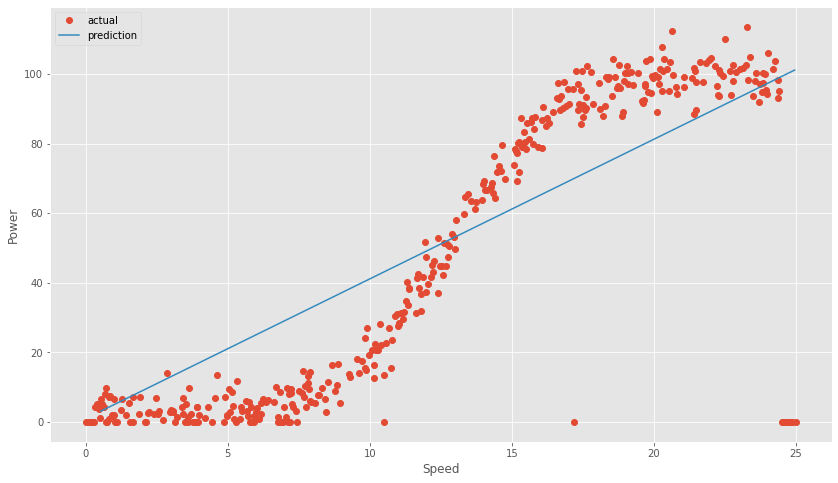

In [8]:
# Plot the training dataset
plt.plot(
    train.speed,
    train.power,
    'o',
    label='actual'
)

# Plot the predictions from the `test` dataset
plt.plot(
    test.speed, 
    model.predict(test.speed),
    label='prediction'
)

plt.xlabel('Speed')
plt.ylabel('Power')

plt.legend();

We can also predict individual values using Keras' `model.predict()` function. Below I find the predicted power output if the speed is 20, and then show where the result appears on the plot.

In [9]:
# Take a hand-picked speed value and view its predicted power value
pred_speed = 20.0
pred_power = model.predict([pred_speed])[0]

pred_power

array([81.23744], dtype=float32)

In [10]:
def plot_predictions():
    # Plot the predictions of the x values we trained on
    plt.plot(
        train.speed,
        train.power,
        'o',
        label='actual'
    )

    plt.plot(
        test.speed, 
        model.predict(test.speed),
        label='prediction'
    )

    plt.xlabel('Speed')
    plt.ylabel('Power')

    # Show the prediction location on the plot
    # Ref: https://www.mathworks.com/matlabcentral/answers/430336-draw-lines-from-both-axis-to-point-in-plot
    plt.plot([pred_speed, pred_speed], [0, pred_power], 'k-')
    plt.plot([0, pred_speed], [pred_power, pred_power], 'k-') 

    plt.legend();

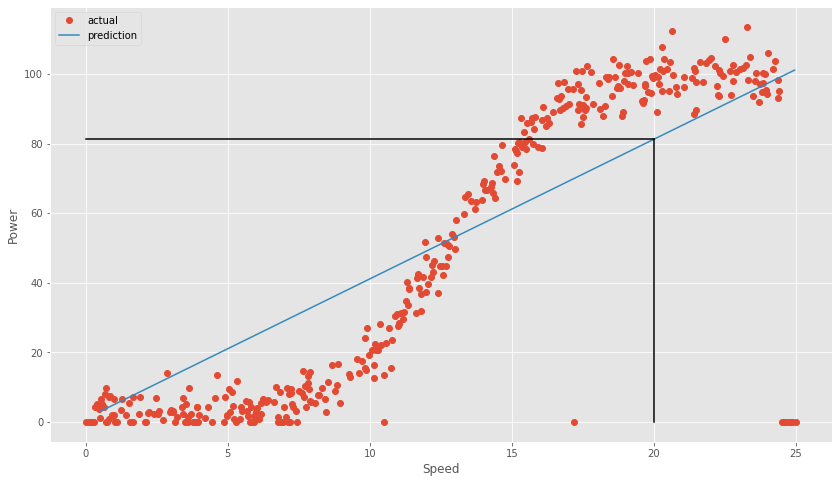

In [11]:
plot_predictions()

As illustrated above, if we attempt to predict the power when the wind speed is 20, we get a value that is much lower than what we would expect. This is because the data in our dataset is not linear, and therefore linear regression is not the best form of regression to perform if we want to make accurate predictions.

## Non-Linear Regression

Linear regression states that the relationship between an independent variable $x$ and a dependent variable $y$ can be best expressed with a line [3]. However, because the `powerproduction` dataset is non-linear, it would make more sense to do polynomial regression. Polynomial regression expresses the relationship between two variables as a polynomial curve [3].

In [12]:
# Re-build the model
model = kr.models.Sequential()

model.add(
    kr.layers.Dense(
        64,
        input_shape=(1,),
        activation='sigmoid',
        kernel_initializer="glorot_uniform",
        bias_initializer="glorot_uniform"
    )
)

model.add(
    kr.layers.Dense(
        1,
        activation='linear',
    )
)

model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [13]:
# Fit the data.
model.fit(
    train.speed,
    train.power,
    epochs=300,
    batch_size=10
)

Epoch 1/300
40/40 [==============================] - 1s 846us/step - loss: 3854.8041
Epoch 2/300
40/40 [==============================] - 0s 846us/step - loss: 3538.1982
Epoch 3/300
40/40 [==============================] - 0s 667us/step - loss: 3342.3668
Epoch 4/300
40/40 [==============================] - 0s 821us/step - loss: 3220.7742
Epoch 5/300
40/40 [==============================] - 0s 667us/step - loss: 2876.3624
Epoch 6/300
40/40 [==============================] - 0s 615us/step - loss: 2583.2546
Epoch 7/300
40/40 [==============================] - 0s 513us/step - loss: 2575.0629
Epoch 8/300
40/40 [==============================] - 0s 513us/step - loss: 2428.6398
Epoch 9/300
40/40 [==============================] - 0s 692us/step - loss: 2372.6359
Epoch 10/300
40/40 [==============================] - 0s 513us/step - loss: 2076.8731
Epoch 11/300
40/40 [==============================] - 0s 641us/step - loss: 2162.3128
Epoch 12/300
40/40 [==============================] - 0s 667us/

40/40 [==============================] - 0s 820us/step - loss: 389.4318
Epoch 98/300
40/40 [==============================] - 0s 857us/step - loss: 248.2152
Epoch 99/300
40/40 [==============================] - 0s 281us/step - loss: 362.4310
Epoch 100/300
40/40 [==============================] - 0s 801us/step - loss: 387.2588
Epoch 101/300
40/40 [==============================] - 0s 538us/step - loss: 346.9696
Epoch 102/300
40/40 [==============================] - 0s 565us/step - loss: 345.6600
Epoch 103/300
40/40 [==============================] - 0s 513us/step - loss: 329.8182
Epoch 104/300
40/40 [==============================] - 0s 641us/step - loss: 370.4310
Epoch 105/300
40/40 [==============================] - 0s 615us/step - loss: 334.9957
Epoch 106/300
40/40 [==============================] - 0s 513us/step - loss: 249.9203
Epoch 107/300
40/40 [==============================] - 0s 589us/step - loss: 335.6528
Epoch 108/300
40/40 [==============================] - 0s 513us/step -

40/40 [==============================] - 0s 399us/step - loss: 242.6368
Epoch 193/300
40/40 [==============================] - 0s 801us/step - loss: 320.2565
Epoch 194/300
40/40 [==============================] - 0s 401us/step - loss: 227.5703
Epoch 195/300
40/40 [==============================] - 0s 568us/step - loss: 285.9106
Epoch 196/300
40/40 [==============================] - 0s 801us/step - loss: 322.6002
Epoch 197/300
40/40 [==============================] - 0s 401us/step - loss: 321.0451
Epoch 198/300
40/40 [==============================] - 0s 567us/step - loss: 316.9021
Epoch 199/300
40/40 [==============================] - 0s 401us/step - loss: 309.9538
Epoch 200/300
40/40 [==============================] - 0s 801us/step - loss: 311.6552
Epoch 201/300
40/40 [==============================] - 0s 401us/step - loss: 383.6148
Epoch 202/300
40/40 [==============================] - 0s 567us/step - loss: 320.1986
Epoch 203/300
40/40 [==============================] - 0s 802us/step

40/40 [==============================] - 0s 568us/step - loss: 481.1163
Epoch 288/300
40/40 [==============================] - 0s 401us/step - loss: 182.3013
Epoch 289/300
40/40 [==============================] - 0s 401us/step - loss: 267.7881
Epoch 290/300
40/40 [==============================] - 0s 401us/step - loss: 223.4867
Epoch 291/300
40/40 [==============================] - 0s 568us/step - loss: 238.1458
Epoch 292/300
40/40 [==============================] - 0s 401us/step - loss: 235.5652
Epoch 293/300
40/40 [==============================] - 0s 561us/step - loss: 225.3370
Epoch 294/300
40/40 [==============================] - 0s 801us/step - loss: 159.1207
Epoch 295/300
40/40 [==============================] - 0s 401us/step - loss: 255.1798
Epoch 296/300
40/40 [==============================] - 0s 799us/step - loss: 301.3332
Epoch 297/300
40/40 [==============================] - 0s 401us/step - loss: 299.9140
Epoch 298/300
40/40 [==============================] - 0s 401us/step

### Analysis

Once again, we can use this newly created model to make predictions. As done previously, I'll plot the values of the `train` dataset along with the predicted values of each point in the `test` dataset. Doing so, we'll find the predicted values form a curved line.

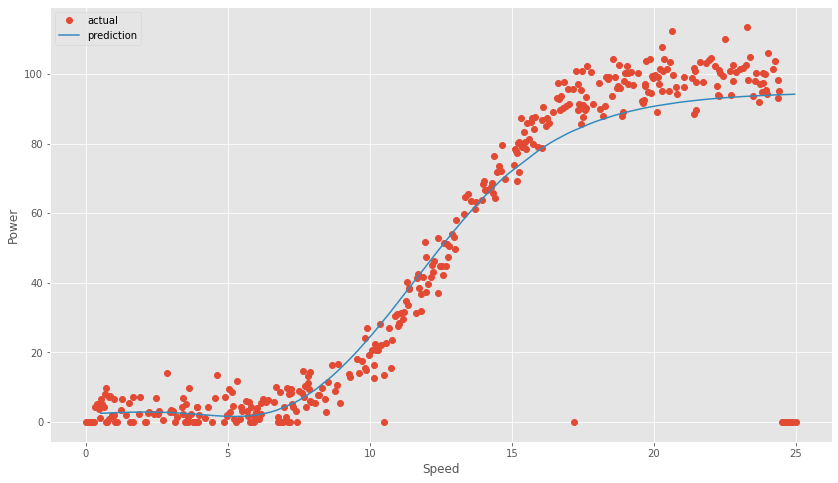

In [14]:
plt.plot(
    train.speed,
    train.power,
    'o',
    label='actual'
)

plt.plot(
    test.speed,
    model.predict(test.speed),
    label='prediction'
)

plt.xlabel('Speed')
plt.ylabel('Power')

plt.legend();

Again, we can provide an input speed of 20 to Keras' `model.predict()` function and plot the result.

In [15]:
pred_power = model.predict([pred_speed])[0]

pred_power

array([90.697784], dtype=float32)

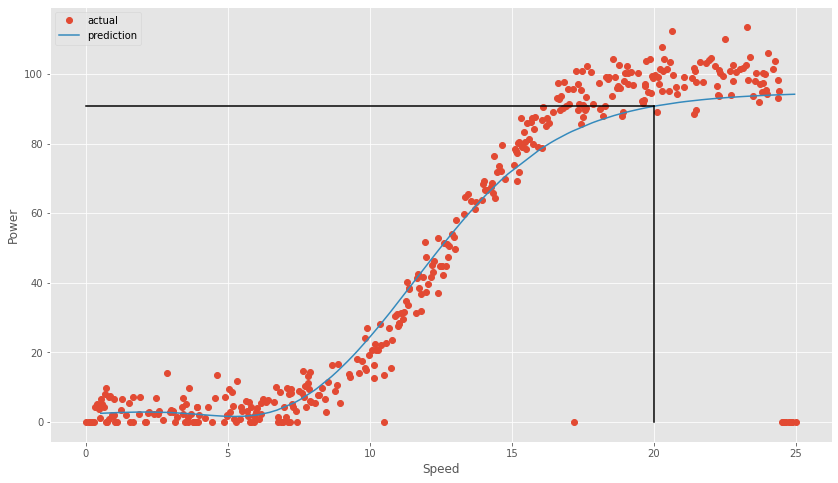

In [16]:
plot_predictions()

We see that the result when using non-linear regression is much more accurate compared to the linear model tested previously.

## Saving the Model

We can use `model.save()` to easily save the model for later use in the web application.

In [17]:
model.save('power_prod.h5')

## References

1. [Train-Test Split for Evaluating Machine Learning Algorithms](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/). Jason Brownlee. Machine Learning Mastery.
1. [Linear Regression using Keras and Python](https://heartbeat.fritz.ai/linear-regression-using-keras-and-python-7cee2819a60c). Dhiraj K. Heartbeat.
2. [Polynomial Regression using tf.keras](https://medium.com/@anigasan637/polynomial-regression-using-tf-keras-17eaac771256). Ananya Gangavarapu. Medium.